# Chapter 33: 

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [81]:
df=pd.read_csv("C:/Users/ITCS/Downloads/recharge_data.csv")
df.head()

,MonthlyUsage,CustomerType,Complaints,Recharged
0,2669,Postpaid,Yes,Yes
1,1151,Basic,No,Yes
2,1584,Basic,Yes,Yes
3,2693,Postpaid,No,Yes
4,500,Postpaid,Yes,No


In [82]:
df.shape

(150, 4)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MonthlyUsage  150 non-null    int64 
 1   CustomerType  150 non-null    object
 2   Complaints    150 non-null    object
 3   Recharged     150 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.8+ KB


In [84]:
df.isnull().sum()

MonthlyUsage    0
CustomerType    0
Complaints      0
Recharged       0
dtype: int64

In [62]:
df.describe

<bound method NDFrame.describe of      MonthlyUsage CustomerType Complaints Recharged
0            2669     Postpaid        Yes       Yes
1            1151        Basic         No       Yes
2            1584        Basic        Yes       Yes
3            2693     Postpaid         No       Yes
4             500     Postpaid        Yes        No
..            ...          ...        ...       ...
145          1343      Premium        Yes       Yes
146          1540      Premium         No       Yes
147           497    Unlimited        Yes        No
148          1283        Basic        Yes       Yes
149          2978      Prepaid         No       Yes

[150 rows x 4 columns]>

In [85]:
Categorical=df.select_dtypes(include='object').columns
numerical=df.select_dtypes(exclude='object').columns

print("Categorical Features :",list(Categorical))
print("Numerical Features :",list(numerical))


Categorical Features : ['CustomerType', 'Complaints', 'Recharged']
Numerical Features : ['MonthlyUsage']


In [86]:
print('Columns: ', df.columns.tolist())

Columns:  ['MonthlyUsage', 'CustomerType', 'Complaints', 'Recharged']


In [87]:
df['CustomerType'].value_counts(normalize=True)
df['Recharged'].value_counts(normalize=True)

Recharged
Yes    0.7
No     0.3
Name: proportion, dtype: float64

In [88]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Recharged']=le.fit_transform(df['Recharged'])
df['CustomerType']=le.fit_transform(df['CustomerType'])
df['Complaints']=le.fit_transform(df['Complaints'])

X=df[['MonthlyUsage', 'CustomerType',  'Complaints']]
y=df['Recharged']

In [89]:
print("X: ",X)
print("Y: ",y)
df

X:       MonthlyUsage  CustomerType  Complaints
0            2669             1           1
1            1151             0           0
2            1584             0           1
3            2693             1           0
4             500             1           1
..            ...           ...         ...
145          1343             2           1
146          1540             2           0
147           497             4           1
148          1283             0           1
149          2978             3           0

[150 rows x 3 columns]
Y:  0      1
1      1
2      1
3      1
4      0
      ..
145    1
146    1
147    0
148    1
149    1
Name: Recharged, Length: 150, dtype: int64


,MonthlyUsage,CustomerType,Complaints,Recharged
0,2669,1,1,1
1,1151,0,0,1
2,1584,0,1,1
3,2693,1,0,1
4,500,1,1,0
...,...,...,...,...
145,1343,2,1,1
146,1540,2,0,1
147,497,4,1,0
148,1283,0,1,1


In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [91]:
df

,MonthlyUsage,CustomerType,Complaints,Recharged
0,2669,1,1,1
1,1151,0,0,1
2,1584,0,1,1
3,2693,1,0,1
4,500,1,1,0
...,...,...,...,...
145,1343,2,1,1
146,1540,2,0,1
147,497,4,1,0
148,1283,0,1,1


In [92]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [93]:
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy:
 0.9777777777777777
Confusion Matrix:
 [[13  0]
 [ 1 31]]


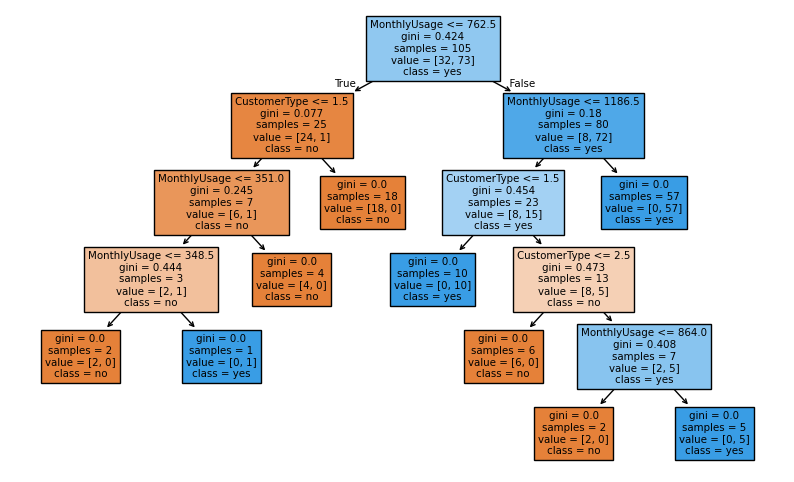

In [94]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plot_tree(model,feature_names= ['MonthlyUsage', 'CustomerType', 'Complaints'],class_names=['no','yes'],filled=True)
plt.show()

In [97]:
new_data = [[1000, 2, 3]] # Postpaid, No Complaints
print('Recharge Prediction:', model.predict(new_data))

Recharge Prediction: [0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
